In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

N = 1024
T = 2 * np.pi
x = np.linspace(-T, T, N)
tend = 3
Nt = 3000
t = np.linspace(0, tend, Nt)
ht = t[1] - t[0]
k = np.pi * np.fft.fftshift(np.arange(-N/2, N/2)) / T
g = 1
a = 0.01
b = 0
u0 = np.exp(-x**2)
udata = [u0]
tdata = [0]

for it in range(1, Nt):
    t1 = it * ht
    u0x = np.gradient(u0, x)
    u0xx = np.gradient(u0x, x)
    u0xxx = np.gradient(u0xx, x)
    k1 = -g * (u0 * u0x) + a * u0xx - b * u0xxx
    u02 = u0 + ht * k1 / 2
    u02x = np.gradient(u02, x)
    u02xx = np.gradient(u02x, x)
    u02xxx = np.gradient(u02xx, x)
    k2 = -g * (u02 * u02x) + a * u02xx - b * u02xxx
    u03 = u0 + ht * k2 / 2
    u03x = np.gradient(u03, x)
    u03xx = np.gradient(u03x, x)
    u03xxx = np.gradient(u03xx, x)
    k3 = -g * (u03 * u03x) + a * u03xx - b * u03xxx
    u04 = u0 + ht * k3
    u04x = np.gradient(u04, x)
    u04xx = np.gradient(u04x, x)
    u04xxx = np.gradient(u04xx, x)
    k4 = -g * (u04 * u04x) + a * u04xx - b * u04xxx
    unew = u0 + ht / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    u0 = np.abs(unew)
    udata.append(u0)
    tdata.append(t1)
    plt.plot(x, np.exp(-x**2), x, unew)
    plt.axis([-2*np.pi, 2*np.pi, 0, 1])
    plt.pause(0.000001)

udata = np.array(udata)
tdata = np.array(tdata)
X, T = np.meshgrid(x, tdata)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, udata, cmap='jet', edgecolor='none')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=30)
plt.show()

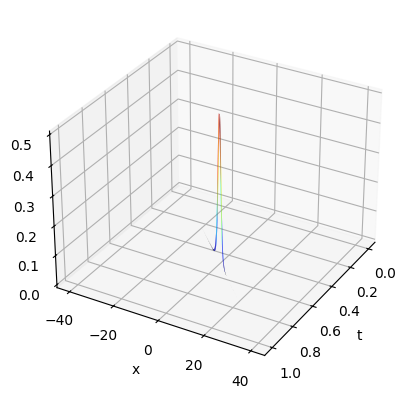

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.fft import fft, ifft, fftshift

N = 1000
T = 40
x = np.linspace(-T, T, N)
tend = 1
Nt = 1000
t = np.linspace(0, tend, Nt)
ht = t[1] - t[0]
k = np.pi * fftshift(np.arange(-N/2, N/2)) / T
c = 1
lambdaold = 1
g = 6
b = 1
a = 0
v0 = np.exp(-x**2)

for i in range(1000):
    vhat = fft(v0)
    num = np.trapz((c + b * k**2) * np.abs(vhat)**2, k)
    den = np.trapz(fft(v0**2) * np.conj(vhat), k)
    lambda_ = 2 / g * num / den
    vnew = g / 2 * lambda_ * fft(v0**2) / (c + b * k**2)
    inv = ifft(vnew)
    if np.max(np.abs(inv - v0)) <= 1e-10 and np.abs(lambda_ - lambdaold) <= 1e-10 and \
            np.max(np.abs((-c - b * k**2) * vhat + (g / 2) * lambda_ * fft(v0**2))) <= 1e-10:
        break
    else:
        v0 = inv
    lambdaold = lambda_

u0 = lambda_ * v0
ua1 = 3 * c / g * np.cosh(np.sqrt(c / (4 * b)) * x)**2
ua2 = 3 * c / g * np.cosh(np.sqrt(c / (4 * b)) * (x - c * tend))**2
udata = [u0]
tdata = [0]

for it in range(1, Nt):
    t1 = it * ht
    u0x = np.gradient(u0, x)
    u0xx = np.gradient(u0x, x)
    u0xxx = np.gradient(u0xx, x)
    k1 = -g * (u0 * u0x) + a * u0xx - b * u0xxx
    u02 = u0 + ht * k1 / 2
    u02x = np.gradient(u02, x)
    u02xx = np.gradient(u02x, x)
    u02xxx = np.gradient(u02xx, x)
    k2 = -g * (u02 * u02x) + a * u02xx - b * u02xxx
    u03 = u0 + ht * k2 / 2
    u03x = np.gradient(u03, x)
    u03xx = np.gradient(u03x, x)
    u03xxx = np.gradient(u03xx, x)
    k3 = -g * (u03 * u03x) + a * u03xx - b * u03xxx
    u04 = u0 + ht * k3
    u04x = np.gradient(u04, x)
    u04xx = np.gradient(u04x, x)
    u04xxx = np.gradient(u04xx, x)
    k4 = -g * (u04 * u04x) + a * u04xx - b * u04xxx
    unew = u0 + ht / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    u0 = np.abs(unew)
    udata.append(u0)
    tdata.append(t1)
    # plt.plot(x, ua1, x, unew)
    # plt.axis([-20, 20, 0, 3 * c / g])
    # plt.pause(0.000001)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tdata, X = np.meshgrid(tdata, x)
# ax.plot_surface(Tdata, X, np.abs(np.array(udata)), cmap='jet', edgecolor='none')

ax.plot_surface(tdata, x, np.abs(np.array(udata)), cmap='jet', edgecolor='none')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=30)
plt.show()